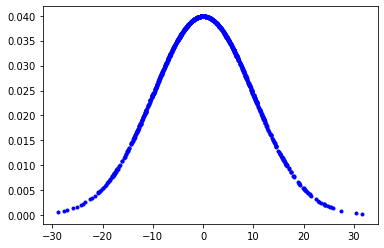

In [75]:
import numpy as np
import matplotlib.pyplot as plt

mu,sigma,n = 0.,10.,1000

def normal(x,mu,sigma):
    return ( 2.*np.pi*sigma**2. )**-.5 * np.exp( -.5 * (x-mu)**2. / sigma**2. )

x = np.random.normal(mu,sigma,n) 
y = normal(x,mu,sigma) 


plt.plot(x,y, 'b.')
plt.show()

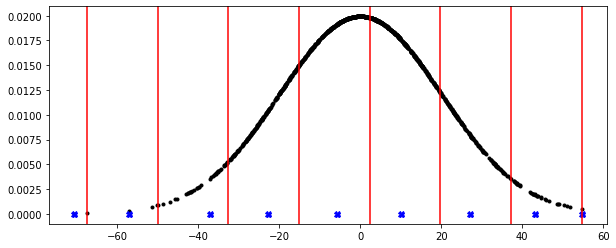

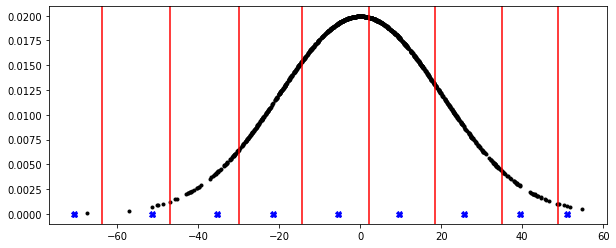

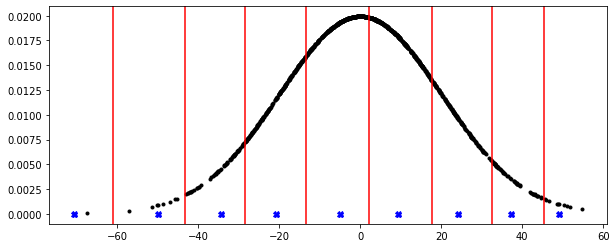

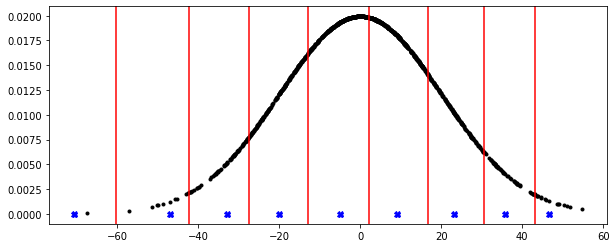

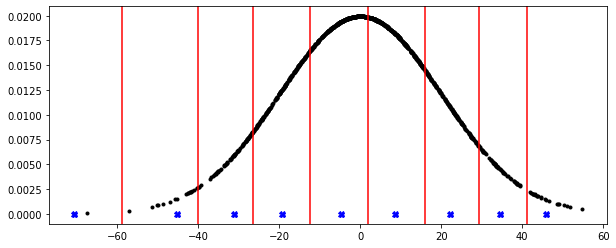

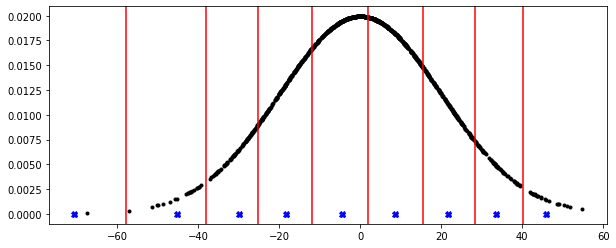

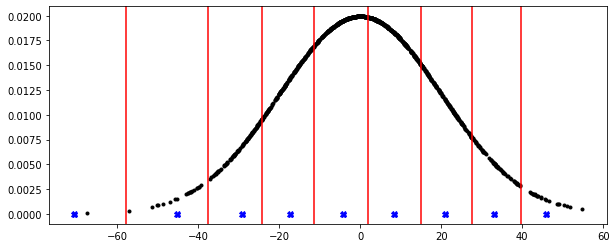

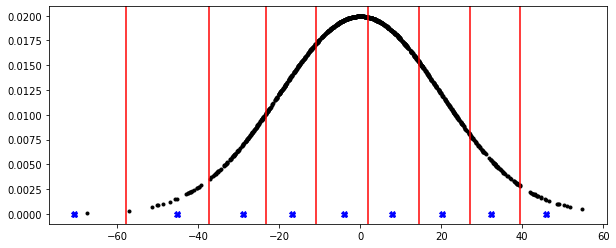

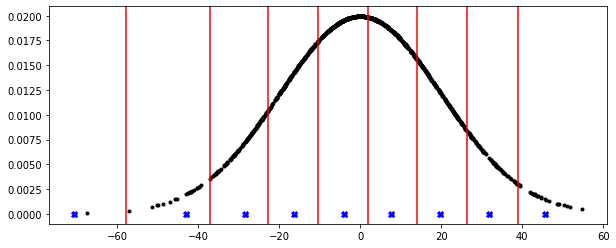

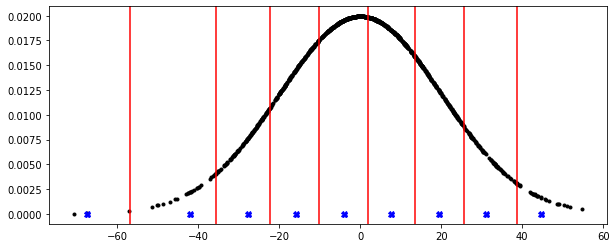

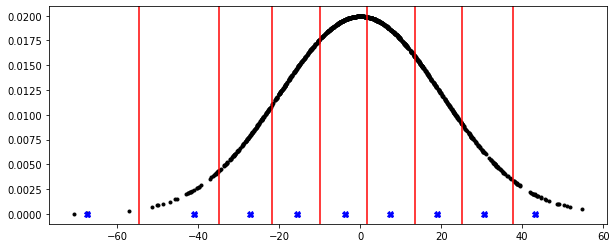

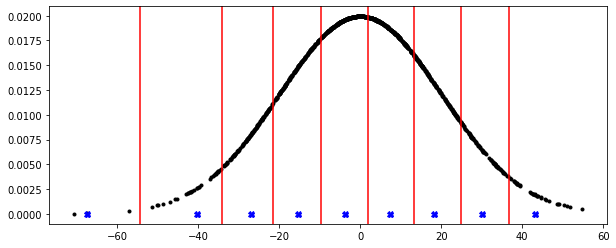

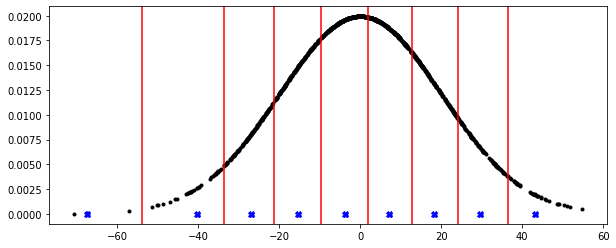

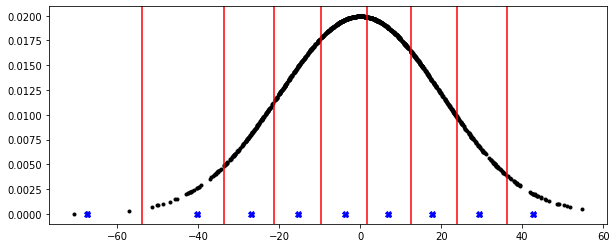

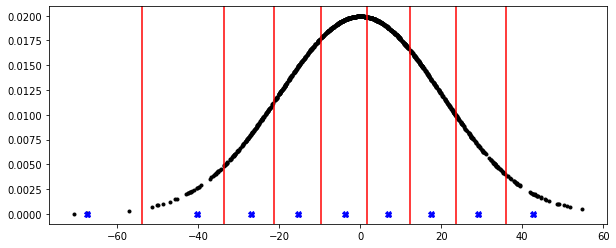

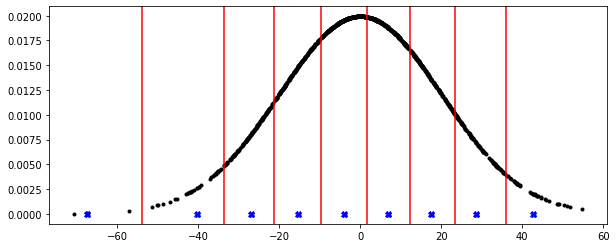

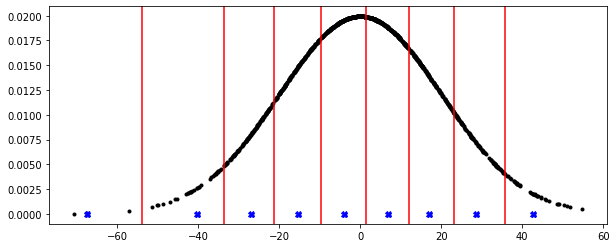

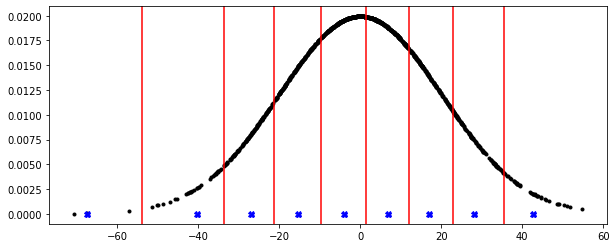

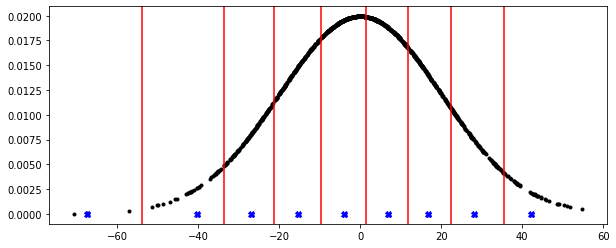

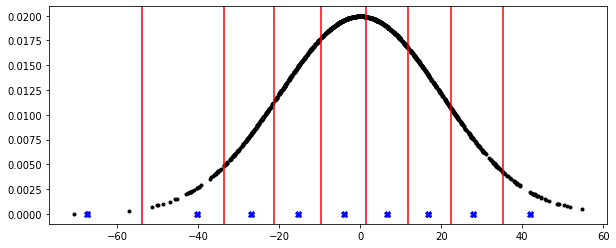

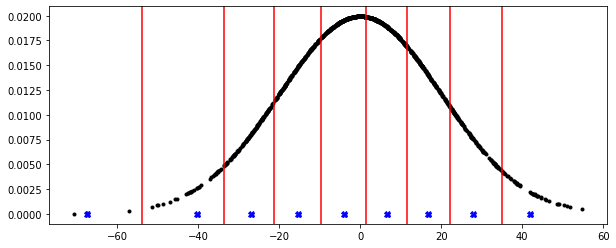

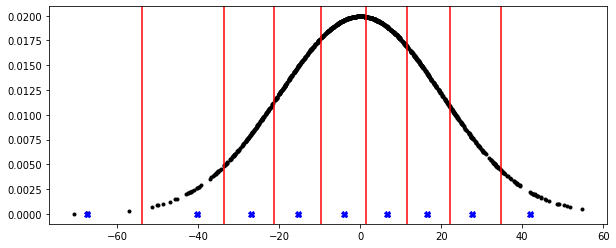

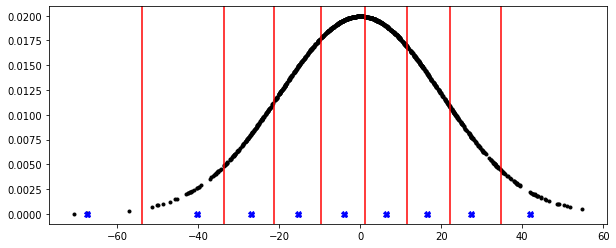

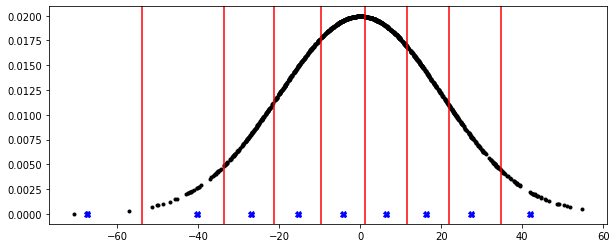

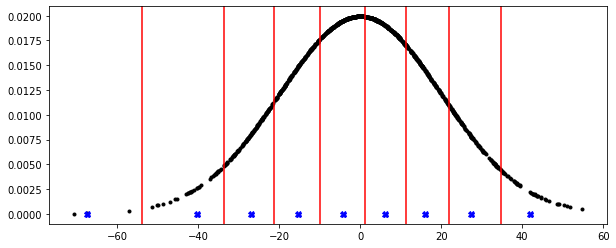

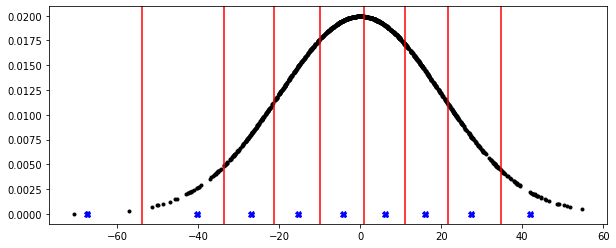

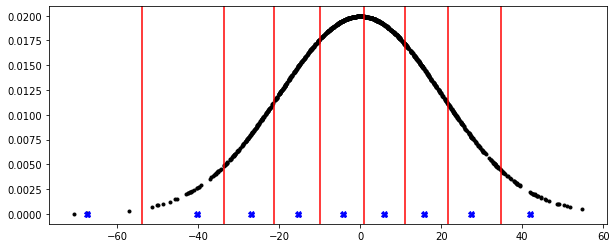

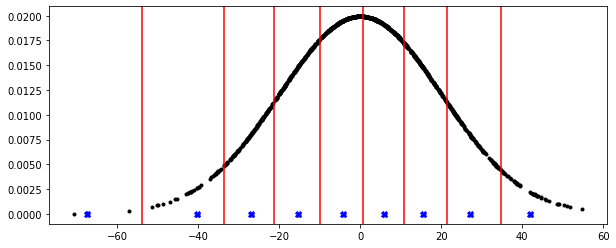

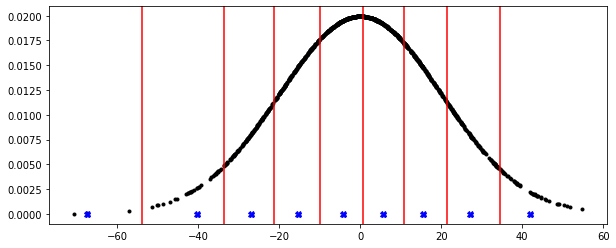

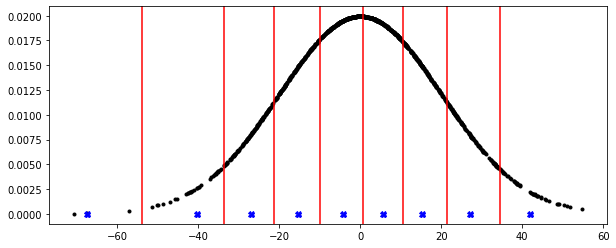

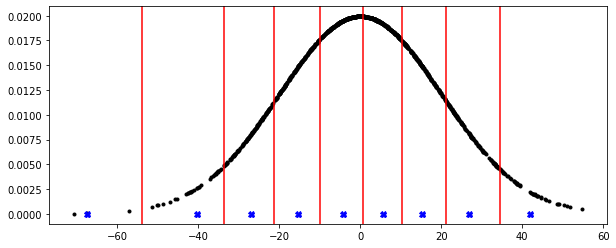

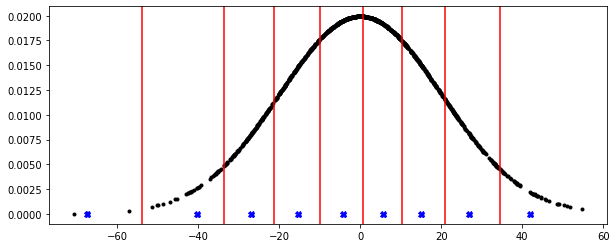

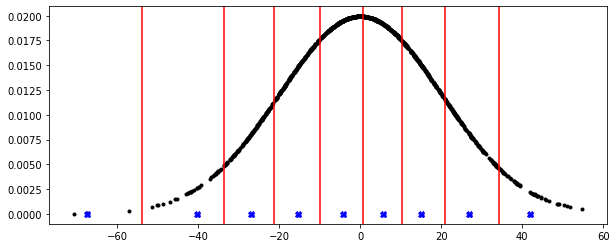

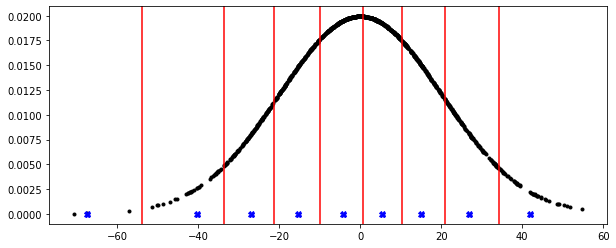

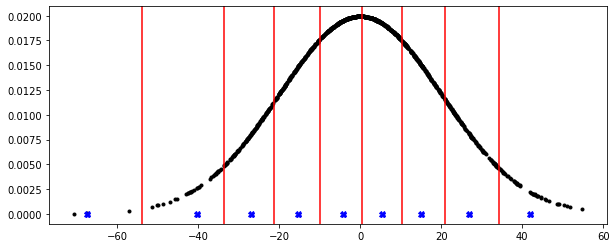

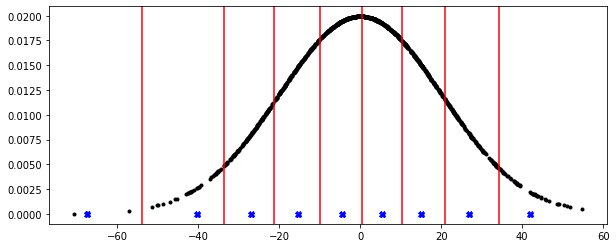

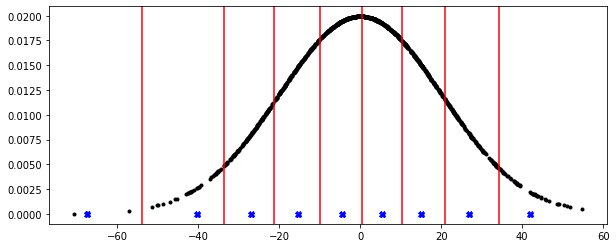

array([-53.87891633, -33.66488058, -21.23066378,  -9.92624857,
         0.51175607,  10.19589671,  20.87220288,  34.35289865])

In [116]:
def plot(data_points, mu, sigma, intervals, centroids):
    y = normal(data_points, mu, sigma)
    plt.figure(figsize=(10, 4))
    plt.plot(data_points,y, 'k.')
    plt.plot(centroids, [0 for i in range(len(centroids))], 'bX')
    for interval in intervals:
        plt.axvline(x=interval, color='r')
    plt.show()

def generate_random_intervals(num_of_intervals, low, high):
    return np.linspace(low, high, num_of_intervals)

def between(arr,low,high):
    in_range_data = arr[np.where((arr >= low) & (arr <=high))]
    if len(in_range_data) == 0:
        if high == np.inf:
            return [low]
        return [high]
    return in_range_data

def find_centroid(data):
    data = np.array(data)
    c_new = data[0]
    min_mse = np.inf
    for x in data:
        cent_data = np.array([x for i in range(len(data))])
        mse = np.sum(np.square(data - cent_data))
        if mse < min_mse:
            c_new = x
            min_mse = mse
    return c_new

def lloyds_quantizer(bit_number=3, sigma=20, mu=0):
    num_of_intervals = (bit_number**2)-1
    data_points = np.random.normal(mu,sigma,1000)
    data_points.sort()
    intervals = generate_random_intervals(num_of_intervals, data_points[1], data_points[len(data_points)-1])
    centroids = np.zeros(num_of_intervals + 1, dtype="float")
    new_intervals = intervals.copy()
    while True:
        for i in range(len(intervals)+1):
            if i == 0:
                centroids[0] = find_centroid(between(data_points, -np.inf, intervals[0]))
            elif i == num_of_intervals:
                centroids[num_of_intervals] = find_centroid(between(data_points, intervals[i-1], np.inf))
            else:
                centroids[i] = find_centroid(between(data_points, intervals[i-1], intervals[i]))
                
        for j in range(num_of_intervals):
            new_intervals[j] = (centroids[j + 1] + centroids[j]) / 2.
        
        plot(data_points, mu, sigma, intervals, centroids)
        
        if list(intervals) == list(new_intervals):
            break
        
        intervals = new_intervals.copy()
    return intervals


lloyds_quantizer()